In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi']= 300

In [13]:
base_swflow = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullFlow16-17Winter_2m_utc_gpm.csv',
                         index_col = 0)
base_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullSWT16-17Winter_2m_utc_f.csv',
                         index_col = 0)
base_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullRWT16-17Winter_2m_utc_f.csv',
                         index_col = 0)
base_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/csl_OAT16-17Winter_2m_utc_f.csv',
                         index_col = 0)
base_swflow_17 = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullFlow17-18Winter_1m_utc_gpm.csv',
                         index_col = 0)
base_swSWT_17 = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullSWT17-18Winter_1m_utc_f.csv',
                         index_col = 0)
base_swRWT_17 = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullRWT17-18Winter_1m_utc_f.csv',
                         index_col = 0)
base_oatRaw_17 = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/csl_OAT17-18Winter_1m_utc_f.csv',
                         index_col = 0)

rl_swflow = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullFlow18FebRL2_1m_utc_gpm.csv',
                         index_col = 0)
rl_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullSWT18FebRL2_1m_utc_f.csv',
                         index_col = 0)
rl_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/iw_mullRWT18FebRL2_1m_utc_f.csv',
                         index_col = 0)
rl_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/csl_OAT18FebRL2_1m_utc_f.csv',
                         index_col = 0)
dp = pd.DataFrame()
dp['kw'] = base_swSWT['c'] +base_swRWT['c']

In [14]:
def getHeatingEnergy(swflow, swt, rwt, min_int = 1):
    htEnergyDf = pd.DataFrame();
    htEnergyDf['kwh'] = 4.187 * swflow['kg/s'] * (swt['c'] - rwt['c']) * (min_int/60.0)
    htEnergyDf[htEnergyDf < 0] = 0
    timeIdx = pd.to_datetime(htEnergyDf.index).tz_localize('utc').tz_convert('US/Eastern')
    htEnergyDf.set_index(timeIdx, inplace = True)
    return htEnergyDf;

def getOAT(oatRaw):
    oat = pd.DataFrame();
    oat['c'] = oatRaw['c']
    timeIdx = pd.to_datetime(oat.index).tz_localize('utc').tz_convert('US/Eastern')
    oat.set_index(timeIdx, inplace = True)
    return oat;
    

In [15]:
base_energy = getHeatingEnergy(base_swflow, base_swSWT, base_swRWT, 2)
rl_energy = getHeatingEnergy(rl_swflow, rl_swSWT, rl_swRWT, 1)
base_oat = getOAT(base_oatRaw)
rl_oat = getOAT(rl_oatRaw)
# Process rl_energy to account for fail of iw weather station
for i in range(rl_energy.shape[0]):
    if rl_oat['c'][i]>10.0 and rl_energy['kwh'][i] > 0.1:
        rl_energy['kwh'][i] = 0.04
# Daily sum of energy (weekdays)
base_energy_daily = pd.DataFrame();
base_energy_daily['kwh'] = base_energy['kwh'].resample('D').sum()
rl_energy_daily = pd.DataFrame();
rl_energy_daily['kwh'] = rl_energy['kwh'].resample('D').sum()
base_energy_daily = base_energy_daily[base_energy_daily.index.dayofweek < 5]
base_energy_daily = base_energy_daily[base_energy_daily.index.month != 3]
rl_energy_daily = rl_energy_daily[rl_energy_daily.index.dayofweek < 5]
# Monthly sum of energy
base_energy_monthly = pd.DataFrame();
base_energy_monthly['kwh'] = base_energy['kwh'].resample('M').sum()
rl_energy_monthly = pd.DataFrame();
rl_energy_monthly['kwh'] = rl_energy['kwh'].resample('M').sum()
# Daily average of oat (weekdays)
base_oat_daily = pd.DataFrame();
base_oat_daily['c'] = base_oat['c'].resample('D').mean()
rl_oat_daily = pd.DataFrame();
rl_oat_daily['c'] = rl_oat['c'].resample('D').mean()
base_oat_daily = base_oat_daily[base_oat_daily.index.dayofweek < 5]
base_oat_daily = base_oat_daily[base_oat_daily.index.month != 3]
rl_oat_daily = rl_oat_daily[rl_oat_daily.index.dayofweek < 5]
# Base daily average oat of feb 06-23
base_oat_daily_interval = pd.DataFrame();
base_oat_daily_interval['c'] = base_oat['c'].resample('D').mean()
base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.month == 2]
base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.day >= 6]
base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.day <= 23]
# rl daily average oat of feb 06-23
rl_oat_daily_all = pd.DataFrame();
rl_oat_daily_all['c'] = rl_oat['c'].resample('D').mean()
# 17-18 base
base_energy_17 = getHeatingEnergy(base_swflow_17, base_swSWT_17, base_swRWT_17, 1)
base_oat_17 = getOAT(base_oatRaw_17)
# Daily sum of energy (weekdays)
base_energy_daily_17 = pd.DataFrame();
base_energy_daily_17['kwh'] = base_energy_17['kwh'].resample('D').sum()
base_energy_daily_17 = base_energy_daily_17[base_energy_daily_17.index.dayofweek < 5]
# Daily average of oat (weekdays)
base_oat_daily_17 = pd.DataFrame();
base_oat_daily_17['c'] = base_oat_17['c'].resample('D').mean()
base_oat_daily_17 = base_oat_daily_17[base_oat_daily_17.index.dayofweek < 5]

In [16]:
rl_energy

,kwh
2018-02-06 00:00:00-05:00,0.039721
2018-02-06 00:01:00-05:00,0.039956
2018-02-06 00:02:00-05:00,0.040169
2018-02-06 00:03:00-05:00,0.040125
2018-02-06 00:04:00-05:00,0.037261
2018-02-06 00:05:00-05:00,0.038539
2018-02-06 00:06:00-05:00,0.038424
2018-02-06 00:07:00-05:00,0.041488
2018-02-06 00:08:00-05:00,0.039475
2018-02-06 00:09:00-05:00,0.039146


In [17]:
print (base_energy_monthly)
print (rl_energy_monthly)

                                    kwh
2016-11-30 00:00:00-05:00   9064.788974
2016-12-31 00:00:00-05:00  21787.098342
2017-01-31 00:00:00-05:00  20181.907227
2017-02-28 00:00:00-05:00  12323.371625
2017-03-31 00:00:00-04:00  11006.409210
                                   kwh
2018-02-28 00:00:00-05:00  7043.746059


In [18]:
base_oat_daily_interval

,c
2017-02-06 00:00:00-05:00,6.087000
2017-02-07 00:00:00-05:00,13.040820
2017-02-08 00:00:00-05:00,6.936330
2017-02-09 00:00:00-05:00,-4.516864
2017-02-10 00:00:00-05:00,-4.903399
2017-02-11 00:00:00-05:00,8.612172
2017-02-12 00:00:00-05:00,8.561714
2017-02-13 00:00:00-05:00,1.377446
2017-02-14 00:00:00-05:00,4.099263
2017-02-15 00:00:00-05:00,1.878854


In [19]:
rl_energy_daily

,kwh
2018-02-06 00:00:00-05:00,442.763422
2018-02-07 00:00:00-05:00,662.798949
2018-02-08 00:00:00-05:00,770.971059
2018-02-09 00:00:00-05:00,573.712752
2018-02-12 00:00:00-05:00,492.158863
2018-02-13 00:00:00-05:00,486.209606
2018-02-14 00:00:00-05:00,260.749702
2018-02-15 00:00:00-05:00,51.214812
2018-02-16 00:00:00-05:00,366.752535
2018-02-19 00:00:00-05:00,269.886417


In [20]:
rl_oat_daily

,c
2018-02-06 00:00:00-05:00,-2.756504
2018-02-07 00:00:00-05:00,-2.302190
2018-02-08 00:00:00-05:00,-5.256351
2018-02-09 00:00:00-05:00,-1.071231
2018-02-12 00:00:00-05:00,-0.162439
2018-02-13 00:00:00-05:00,0.367533
2018-02-14 00:00:00-05:00,8.173204
2018-02-15 00:00:00-05:00,14.781290
2018-02-16 00:00:00-05:00,5.706644
2018-02-19 00:00:00-05:00,9.921816


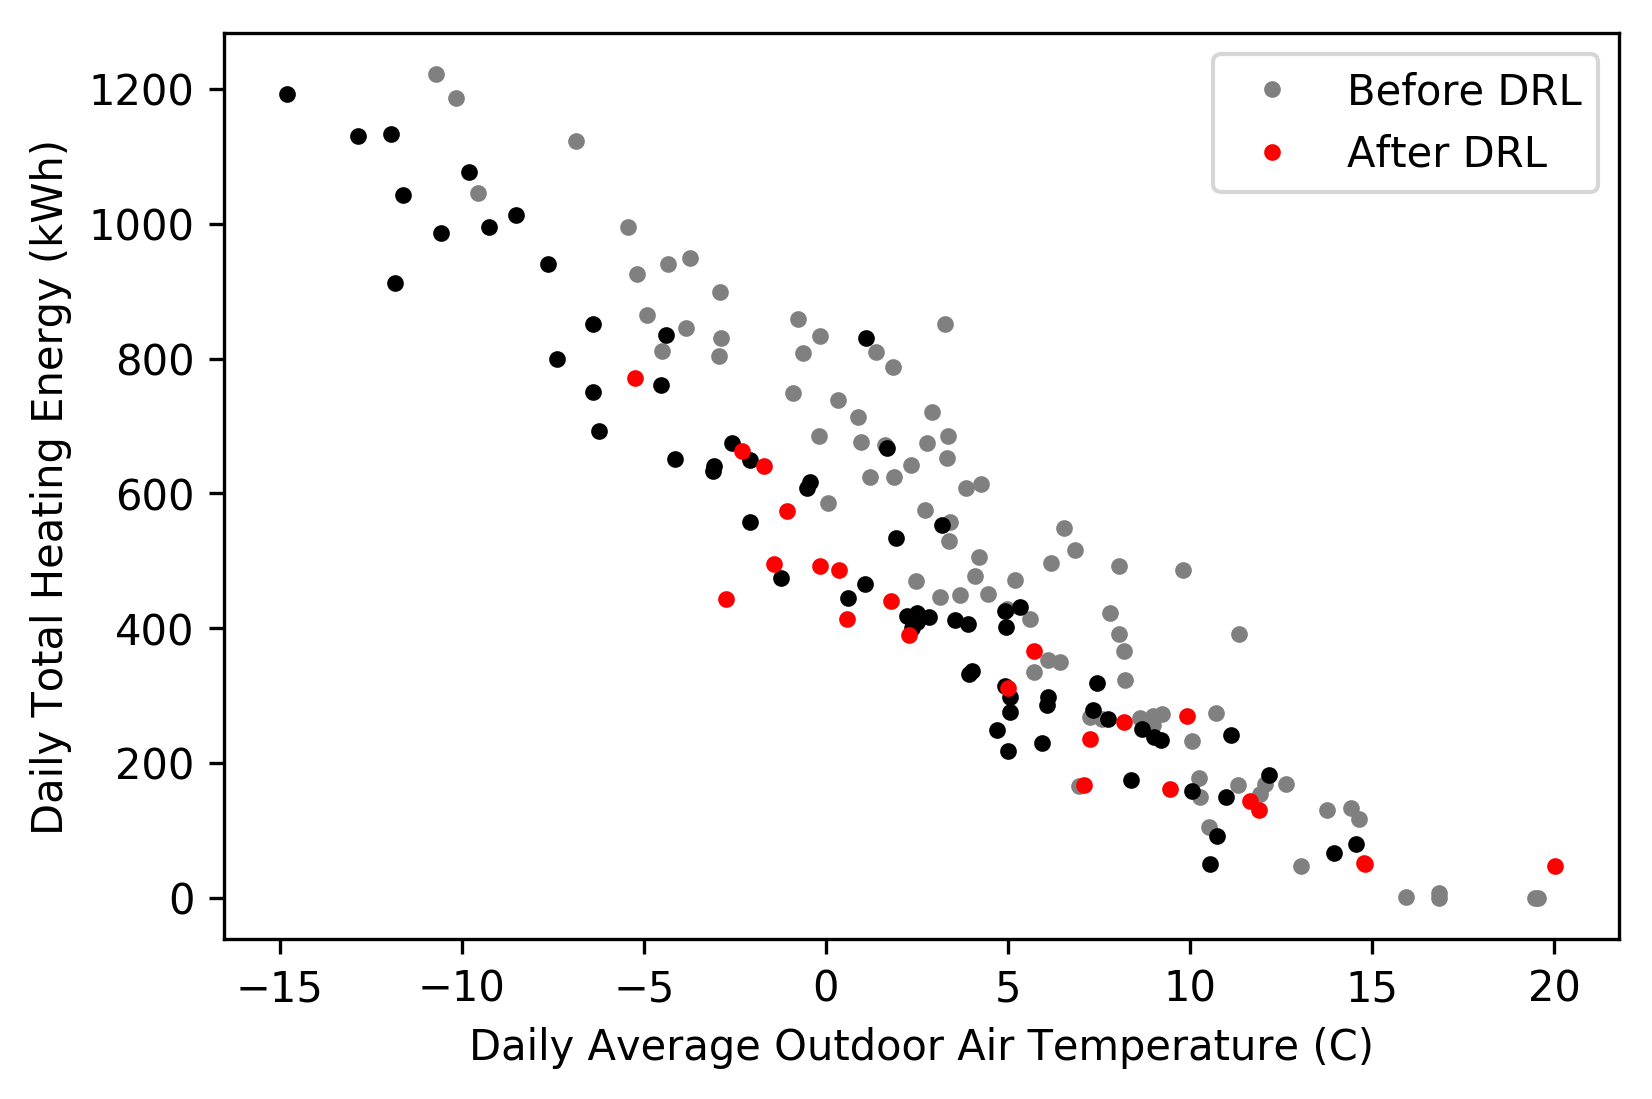

In [21]:
plt.plot(base_oat_daily.as_matrix(columns = ['c']), base_energy_daily.as_matrix(columns = ['kwh']), '.', color = 'gray', label='Before DRL')
plt.plot(base_oat_daily_17.as_matrix(columns = ['c']), base_energy_daily_17.as_matrix(columns = ['kwh']), '.', color = 'black')
plt.plot(rl_oat_daily.as_matrix(columns = ['c']), rl_energy_daily.as_matrix(columns = ['kwh']), '.', color = 'red', label='After DRL')
plt.plot(9.45, 162, '.', color = 'red')
plt.plot(1.78, 441, '.', color = 'red')
plt.plot(0.57, 414, '.', color = 'red')
plt.plot(2.27, 390, '.', color = 'red')
plt.plot(-1.42, 496, '.', color = 'red')
plt.plot(-1.71, 641, '.', color = 'red')
plt.xlabel('Daily Average Outdoor Air Temperature (C)', fontsize=10)
plt.ylabel('Daily Total Heating Energy (kWh)', fontsize=10)
plt.legend(loc='upper right')

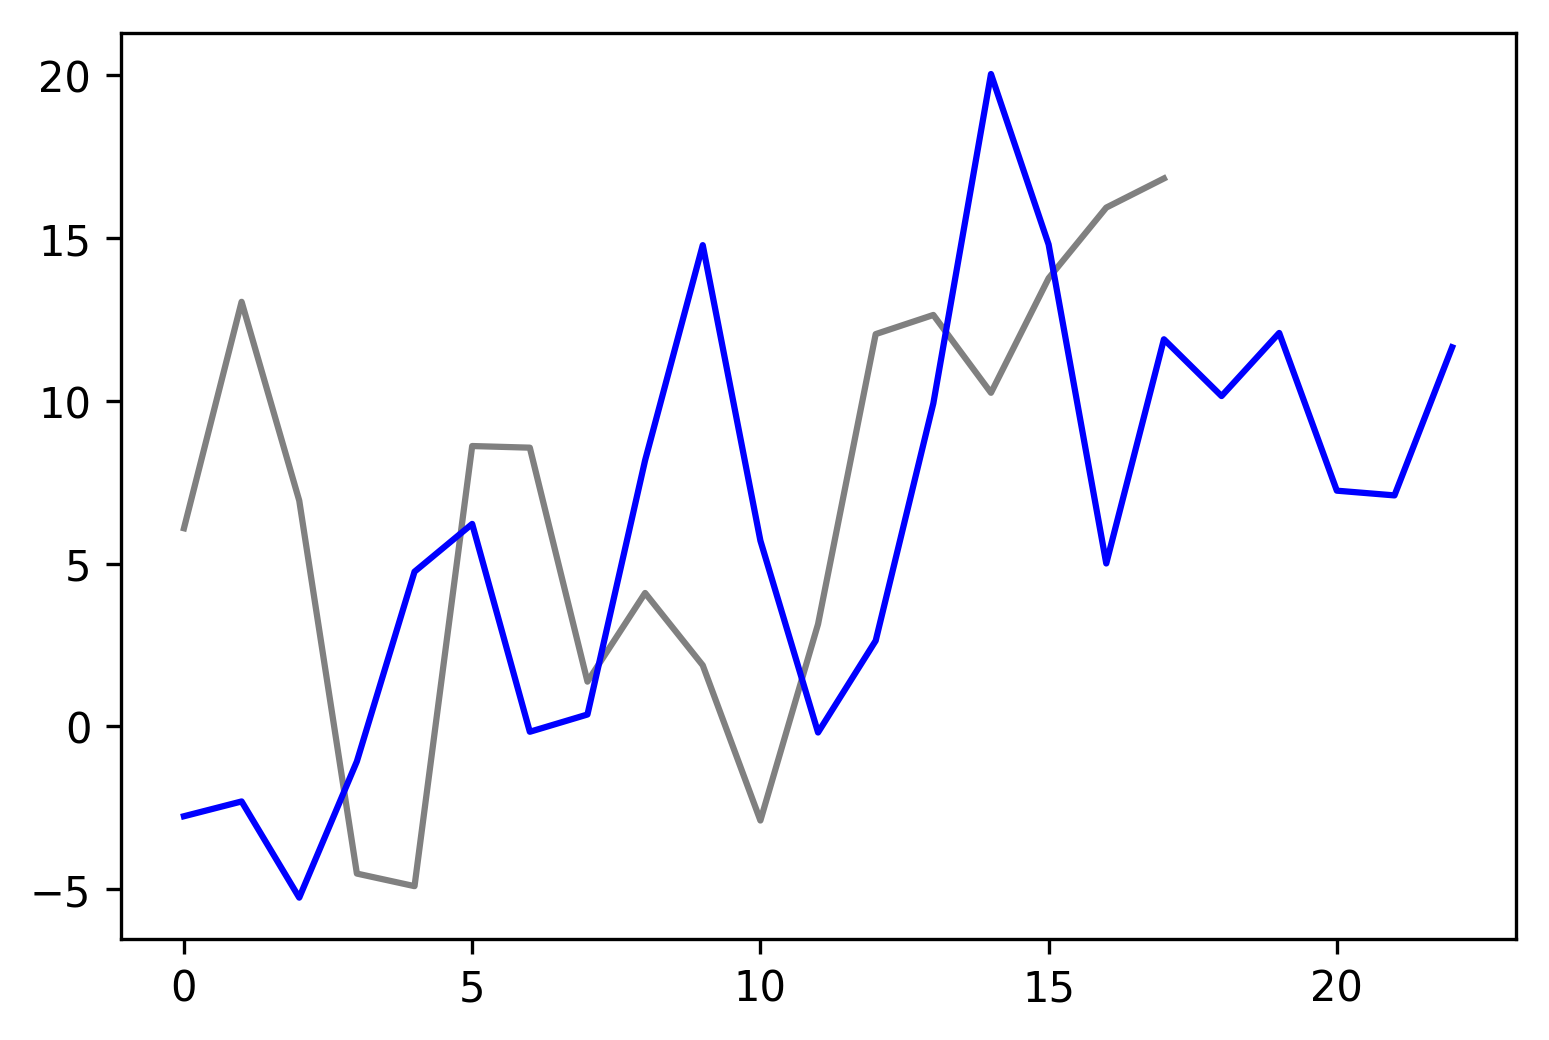

In [22]:
plt.plot(base_oat_daily_interval.as_matrix(columns = ['c']), color = 'gray')
plt.plot(rl_oat_daily_all.as_matrix(columns = ['c']), color = 'blue')

In [54]:
base_oat_month_mean = np.mean(base_oat_daily_interval.as_matrix(columns = ['c']))
rl_oat_month_mean = np.mean(rl_oat_daily_all.as_matrix(columns = ['c']))

In [56]:
print (base_oat_month_mean, rl_oat_month_mean, (rl_oat_month_mean-base_oat_month_mean)/base_oat_month_mean)

6.827213918925987 5.142113870560897 -0.2468210412586836
